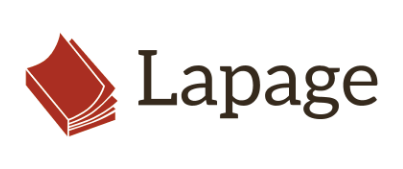

Lapage est une grande librairie généraliste en ligne très réputée. Elle était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. L’entreprise souhaite faire le point après deux ans d’exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements clients, etc.

L'objet de ce notebook est d'effectuer une analyse sur deux aspects principaux :
- Une analyse des différents indicateurs de vente, surtout, l’évolution du chiffre d'affaires dans le temps, les tops et les flops des produits et la répartition du chiffre d'affaires entre les clients
- Une analyse plus ciblée sur les clients : l’objectif serait cette fois-ci de comprendre le comportement des clients en ligne.

## Sommaire
* [Mise en route](#section_1)
    * [Operations de base](#section_1_1)
    * [Jeu des données](#section_1_2)
* [Nettoyage des données](#section_2)
    * [Nettoyage de la table customers](#section_2_1)
    * [Nettoyage de la table products](#section_2_2)
    * [Nettoyage de la table transactions](#section_2_3)
* [Fusion des tables](#section_3)
    * [Fusion transactions-products](#section_3_1)
    * [Fusion transactions-customers](#section_3_2)
    * [Fusion transactions-customers-products](#section_3_3)
* [Demandes d'Antoine : Analyse des ventes](#section_4)
    * [Répartition du chiffre d'affaires](#section_4_1)
    * [Évolution du CA dans le temps](#section_4_2)
    * [Zoom sur les références](#section_4_3)
    * [Zoom sur les profils clients](#section_4_4)
* [Demandes de Julie : Analyse des profils clients](#section_5)
    * [Préparation des données pour l'analyse](#section_5_0)
    * [1. Lien entre le genre d’un client et les catégories des livres achetés](#section_5_1)
    * [2. lien entre l’âge des clients et le montant total des achats](#section_5_2)
    * [3. lien entre l’âge des clients et la fréquence d’achat](#section_5_3)
    * [4. lien entre l’âge des clients et la taille du panier moyen](#section_5_4)
    * [5. lien entre l’âge des clients et les catégories des livres achetés](#section_5_5)

<div id="section_1"><h2 style="background-color:#ff7366; padding:2rem; color:white; text-transform: uppercase">Mise en route</h2></div>

<div id="section_1_1"><h3 style="color:#AA2E22">Operations de base</h3></div>

In [1]:
# Importer les librairies : Numpy, Pandas, Scipy, Sklearn (LinearRegression), Matplotlib, seaborn et os 
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Enregistrer le chemin du dossier de notre projet
os.chdir("F:/OneDrive/Learning/OpenClassrooms/DataAnalyst/P6/data")
# Modifier un parametrage du pandas
pd.options.display.max_columns=999
# Afficher des décimaux sans format scientifique
pd.options.display.float_format = '{:.3f}'.format
# Identifier les valeurs qui seront considérées comme nulles
missing_values = ["n/a", "na", "--","nan","NaN", "NaT", " ", ""]

In [3]:
# Charger le jeu de données - 3 fichiers CSV : customers, products et transactions
customers = pd.read_csv("customers.csv", na_values = missing_values)
products = pd.read_csv("products.csv", na_values = missing_values)
transactions = pd.read_csv("transactions.csv", na_values = missing_values)

<div id="section_1_2"><h3 style="color:#AA2E22">Jeu de données</h3></div>

Le jeu de données se consiste de trois fichiers en format CSV: customers, products et transactions

#### La table customers

La table customers contient 8623 lignes et 3 colonnes.

In [4]:
customers.shape

(8623, 3)

In [5]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


#### La table products

La table products contient 3287 lignes et 3 colonnes.

In [6]:
products.shape

(3287, 3)

In [7]:
products.head()

,id_prod,price,categ
0,0_1421,19.990,0
1,0_1368,5.130,0
2,0_731,17.990,0
3,1_587,4.990,1
4,0_1507,3.990,0


#### La table transactions

La table customers est la plus grande, elle contient 679532 lignes et 4 colonnes.

In [8]:
transactions.shape

(679532, 4)

In [9]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


<div id="section_2"><h2 style="background-color:#ff7366; padding:2rem; color:white; text-transform: uppercase">Nettoyage des données</h2></div>

Le nettoyage des données est une phase préliminaire dans l'analyse de données. Il s'agit du processus de détection, de correction, ou de suppression toute erreur présente sur le jeu de données. On va essayer surtout de chercher s'il y a :
- des valeurs vides ou nulles,
- des informations incohérentes ou incorrectes,
- des colonnes à mono-valeurs,
- et, de redondance.

<div id="section_2_1"><h3 style="color:#AA2E22">Nettoyage de la table customers</h3></div>

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


Parfait ! Il n'y a pas de valeurs nulles dans toutes les colonnes.

In [11]:
customers.duplicated().sum()

0

Pas de doublons absolus.

#### Contrôle d'intégrité de la clé primaire

In [12]:
customers.client_id.duplicated().sum()

0

La clé primaire client_id est saine, sans valeurs nulles et sans doublons.

#### Contrôle de la cohérence des données

In [13]:
customers.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

In [14]:
customers.sex.unique()

array(['f', 'm'], dtype=object)

Les données de la colonne sex sont cohérentes.

In [15]:
customers.birth.describe()

count   8623.000
mean    1978.281
std       16.920
min     1929.000
25%     1966.000
50%     1979.000
75%     1992.000
max     2004.000
Name: birth, dtype: float64

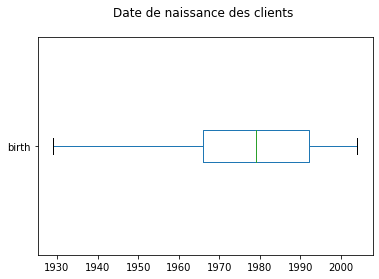

In [16]:
customers.birth.plot(kind='box', vert=False, title="Date de naissance des clients \n")
plt.show()

Il semble que les dates de naissance des clients soient plutôt cohérentes. Pas des outliers.

<div id="section_2_2"><h3 style="color:#AA2E22">Nettoyage de la table products</h3></div>

In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


Impeccable ! Il n'y a pas de valeurs nulles dans toutes les colonnes.

In [18]:
products.duplicated().sum()

0

Il n'y a pas de doublons absolus.

#### Contrôle d'intégrité de la clé primaire

In [19]:
products.id_prod.duplicated().sum()

0

La clé primaire id_prod est saine. Pas de valeurs nulles et pas de doublons.

#### Contrôle de la cohérence des données

In [20]:
products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

In [21]:
products.price.describe()

count   3287.000
mean      21.857
std       29.848
min       -1.000
25%        6.990
50%       13.060
75%       22.990
max      300.000
Name: price, dtype: float64

On aperçoit qu'il y un ou des prix négatifs qui parait bizarre. En première temps, on va détecter les prix qui sont moins ou égaux à zéro.

In [22]:
products[products.price <= 0]

,id_prod,price,categ
731,T_0,-1.000,0


Il n'y a que le produit T_0 qui a un prix négatif (-1). Il semble que ce soit un produit de test dont le prix est fixé exprès à zéro pour le distinguer des autres. Quoi qu'il en soit, avoir un prix négatif semble problématique et va perturber l'analyse, on va alors s'en débarrasser.

In [23]:
products = products[products['price'] != -1]

Une petite vérification

In [24]:
products[products.price <= 0]

,id_prod,price,categ


Très bien, le produit à prix négatif est disparu. On va maintenant vérifier les prix des autres produits pour détecter d’éventuelles outliers.

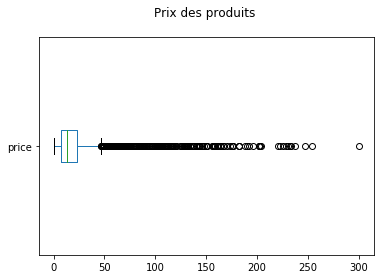

In [25]:
products.price.plot(kind='box', vert=False, title="Prix des produits \n")
plt.show()

On constate qu'il y a beaucoup d'outliers. Pour détecter et lister ces valeurs, on va utiliser une formule mathématique de la statistique descriptive. Il s'agit de calculer le premier quartile Q1, le troisième quartile et l'écart interquartile IQR selon la formule IQR = Q3 - Q1. Puis, sera considérée comme une valeur aberrante toute valeur supérieure à Q3 + (1,5 * IQR) ainsi que celle inférieure à Q1 - (1,5 * IQR).

In [26]:
# Calculer le premier quartile Q1 du prix
price_q1 = products.price.quantile(0.25)
# Calculer le troisième quartile Q3 du prix
price_q3 = products.price.quantile(0.75)
# Calculer l'écart interquartile IQR du prix
price_iqr = price_q3 - price_q1

In [27]:
# détecter et lister les valeurs aberrantes du prix de produit
price_outliers = products[(products['price'] < (price_q1 - 1.5 * price_iqr)) | 
                          (products['price'] > (price_q3 + 1.5 * price_iqr))].copy()

In [28]:
price_outliers.shape

(302, 3)

In [29]:
price_outliers.sort_values(by='price', ascending=False).head(10)

,id_prod,price,categ
947,2_2,300.000,2
724,2_76,254.440,2
394,2_158,247.220,2
1436,2_167,236.990,2
2779,2_30,233.540,2
1960,2_125,231.990,2
2487,2_166,230.040,2
786,2_40,228.110,2
10,2_228,225.170,2
1896,2_4,222.970,2


Bien qu'il y ait mathématiquement beaucoup de valeurs aberrantes, elles semblent plutôt raisonnables. **Il n'y a pas de prix extrêmement élevés**. Très probablement, ils appartiennent à des livres qui sont intrinsèquement plus chers, comme les grands dictionnaires et les encyclopédies en plusieurs volumes, les livres de photographie de haute qualité, etc. Ainsi, on va les accepter tous ensemble.

<div id="section_2_3"><h3 style="color:#AA2E22">Nettoyage de la table transactions</h3></div>

In [30]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Super ! Il n'y a pas de valeurs nulles dans toutes les colonnes.

In [31]:
transactions.duplicated().sum()

126

On voit cependant qu'il y a 126 doublons absolus (doublon au niveau de la ligne entière). Jetons un coup d'oeil à ces doublons

In [32]:
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [33]:
transactions[transactions.duplicated()].nunique()

id_prod        1
date          36
session_id     1
client_id      2
dtype: int64

On aperçoit déjà quelques choses intéressantes sur les doublons: 
* Ils appartiennent à un seul produit T_0
* Ils appartiennent à un seule session s_0
* Ils appartiennent à deux clients : ct_0 et ct_1
* Quasiment toutes les dates sont préfixées par 'test', on va vérifier ça plus tard.

Il semble que les doublons appartiennent à des tests effectués en 36 dates différentes impliquant le produit T_0 et deux clients ct_0 et ct_1. On a déjà conclu que le produit T_0 est très probablement un produit de test puisque son pris était négatif (-1). On l'a même supprimé de la table products. On va maintenant détecter et lister toutes les transactions impliquant le produit de test T_0.

In [34]:
(transactions['id_prod'] == 'T_0').sum()

200

Il y a 200 transactions impliquant le produit de test T_0. Regardons-les de près.

In [35]:
transactions[transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Il semble que toutes les transactions impliquant le produit T_0 appartiennent également à une session de test s_0 et à deux clients de test ct_0 et ct_1. Leurs dates sont également préfixées par 'test'. Vérifions cette hypothèse.

In [36]:
transactions[transactions['id_prod'] == 'T_0'].nunique()

id_prod        1
date          39
session_id     1
client_id      2
dtype: int64

In [37]:
transactions[transactions['id_prod'] == 'T_0'].session_id.unique()

array(['s_0'], dtype=object)

In [38]:
transactions[transactions['id_prod'] == 'T_0'].client_id.unique()

array(['ct_0', 'ct_1'], dtype=object)

In [39]:
transactions[transactions['id_prod'] == 'T_0'].date.str.startswith('test').sum()

200

Très bien, on est maintenant sûr et certain que les lignes appartiennent bien aux données de test. Bien qu'il n'y ait généralement pas besoin de telles données, on va cependant les stocker dans une variable au cas où.

In [40]:
transactions_test = transactions[transactions['id_prod'] == 'T_0'].copy()

In [41]:
transactions_test.shape

(200, 4)

In [42]:
transactions = transactions[transactions['id_prod'] != 'T_0'].copy()

C'est fait, maintenant vérifions de nouveau les doublons.

In [43]:
transactions.duplicated().sum()

0

Parfait, la table est maintenant sans doublons.

#### Contrôle d'intégrité de la clé primaire

La relation entre la table transactions et la table customers est une relation de type un à plusieurs, autrement dit, chaque client peut faire plusieurs transactions. De même, la relation entre les tables transactions et products est également de type un à plusieurs, où un produit peut être vendu plusieurs fois. La clé primaire de la table transactions est bien composée de toutes les quatre colonnes.

On sait très bien qu'une clé primaire doit être unique (sans doublons) et n'a pas de valeurs nulles. On sait déjà que la table transactions n'a pas aucune valeur nulle. De même, elle n'a pas de doublons absolus. Donc, sa clé primaire est tout à fait saine.

#### Contrôle de la cohérence des données

On remarque que le type de données dans la colonne date est objet. Pour optimiser l'analyse, toute valeur de date/heure doit être dans un type de données particulier appelé datetime afin que Pandas puisse la traiter efficacement. On va alors convertir le type de données de la colonne date en datatime.

In [44]:
transactions["date"] = pd.to_datetime(transactions["date"])

On a trouvé qu'il y a deux clients particuliers, ce sont les clients de test (ct_0 et ct_1). On a déjà les supprimer de la table clients, il convient maintenant de supprimer leurs achats dans la table transactions pour ne pas influencer l'analyse.

In [45]:
customers = customers.loc[~customers.client_id.isin(['ct_0', 'ct_1'])]

Dernière vérification

In [46]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


<div id="section_3"><h2 style="background-color:#ff7366; padding:2rem; color:white; text-transform: uppercase">Fusion des tables</h2></div>

<div id="section_3_1"><h3 style="color:#AA2E22">Fusion transactions-products</h3></div>

#### Fusion gauche : transactions-products

La fusion gauche transactions-products permet de détecter s'il y a des transactions impliquant des produits sans références dans la table products.

In [47]:
transactions_products = pd.merge(transactions, products, how='left', on='id_prod')

In [48]:
transactions_products.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
dtype: int64

On s'aperçoit qu'il y a 221 valeurs nulles dans les colonnes venant de la table products. Cela signifie que ces 221 transactions impliquent des produits qui n'ont pas de références dans la table products. On va tout d'abord identifier ces produits.

In [49]:
transactions_products[transactions_products.price.isnull()].id_prod.unique()

array(['0_2245'], dtype=object)

On voit qu'il n'y a qu'un seul produit 0_2245 qui n'est pas référencé dans la table products. Celui-ci fait effectivement partie des 221 transactions. Il est préférable de stocker ces transactions dans une variable au cas où.

In [50]:
unreferenced_transactions = transactions_products[transactions_products.price.isnull()]
unreferenced_transactions.head()

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,nan,nan
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,nan,nan
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,nan,nan
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,nan,nan
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,nan,nan


#### Fusion droite : transactions-products

La fusion droite transactions-products permet de détecter s'il y a des produits stagnants, autrement dit, des produits qui ne font pas partie d'aucune transaction.

In [51]:
products_transactions = pd.merge(transactions, products, how='right', on='id_prod')

In [52]:
products_transactions.isnull().sum()

id_prod        0
date          21
session_id    21
client_id     21
price          0
categ          0
dtype: int64

On remarque qu'il y a 21 valeurs nulles dans les colonnes venant de la table transactions. Cela signifie qu'il y a 22 produits qui ne sont jamais vendus, autrement dit, des produits stagnants.  Il est préférable de stocker les références de ces produits,  au cas où.

In [53]:
stagnant_products = products[products['id_prod'].isin(transactions.id_prod) == False]
stagnant_products.head()

,id_prod,price,categ
184,0_1016,35.060,0
279,0_1780,1.670,0
737,0_1062,20.080,0
794,0_1119,2.990,0
811,0_1014,1.150,0


<div id="section_3_2"><h3 style="color:#AA2E22">Fusion transactions-customers</h3></div>

#### Fusion gauche : transactions-customers

La fusion gauche transactions-customers permet de détecter s'il y a des transactions impliquant des clients sans références dans la table clients. 

In [54]:
transactions_customers = transactions.merge(customers, how='left', on='client_id')

In [55]:
transactions_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 36.3+ MB


Très bien, Il n'y pas de valeurs nulles dans toutes les colonnes. Autrement dit, tous les clients qui ont fait des transactions sont bien référencés dans la table customers.

#### Fusion droite : transactions-customers

La fusion droite transaction-clients permet de détecter s'il y a des clients inactifs, autrement dit, des clients qui n'ont jamais fait aucune transaction.

In [56]:
customers_transactions = transactions.merge(customers, how='right', on='client_id')

In [57]:
customers_transactions.isnull().sum()

id_prod       21
date          21
session_id    21
client_id      0
sex            0
birth          0
dtype: int64

On aperçoit qu'il y a 21 valeurs nulles dans les colonnes venant de la table customers. Cela veut dire qu'il y a 21 clients qui n'ont jamais fait aucune transaction, c-à-d des clients inactifs. On va les stocker dans une variable.

In [58]:
inactive_customers = customers[customers.client_id.isin(transactions.client_id) == False]
inactive_customers.head()

,client_id,sex,birth
801,c_8253,f,2001
2483,c_3789,f,1997
2734,c_4406,f,1998
2769,c_2706,f,1967
2851,c_3443,m,1959


In [59]:
inactive_customers.shape

(21, 3)

<div id="section_3_3"><h3 style="color:#AA2E22">Fusion transactions-customers-products</h3></div>

Pour la fusion finale, on va choisir l'une des tables de fusion ci-dessus, et la fusionner avec la troisième table. Pour un résultat plus cohérent, on va prendre la table transactions_customers et la fusionner avec la table products. Bien entendu, il est nécessaire d'opter pour une fusion interne cette fois-ci pour éviter d'avoir des valeurs nulles. Autrement dit, on va automatiquement exclure les 221 transactions impliquant le produit sans référence dans la table products.

In [60]:
tcp = pd.merge(transactions_customers, products, how='inner', on='id_prod')

In [61]:
tcp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   sex         679111 non-null  object        
 5   birth       679111 non-null  int64         
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 46.6+ MB


In [62]:
tcp.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.180,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,m,1985,4.180,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,f,1974,4.180,0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,f,1962,4.180,0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,f,1976,4.180,0


<div id="section_4"><h2 style="background-color:#ff7366; padding:2rem; color:white; text-transform: uppercase">Demandes d'Antoine : Analyse des ventes</h2></div>

Avant de procéder à l'analyse, et pour ne pas modifier la table de la fusion finale tcp au cours de l'analyse, il convient d'en faire une copie et la stocker dans une nouvelle variable.

In [63]:
sales = tcp.copy()

<div id="section_4_1"><h3 style="color:#AA2E22">Répartition du chiffre d'affaires</h3></div>

#### Calcul du chiffre d'affaires global

In [64]:
turnover = round(sales.price.sum(), 2)
print("Le chiffre d'affaires global s'élève à", turnover)

Le chiffre d'affaires global s'élève à 11853728.68


#### Répartition du CA par âge des clients (âge au moment d'achat)

In [65]:
# Calculer l'âge du client au moment d'achat age_pt (age at purchase time)
sales['age_pt'] = sales.date.dt.year - sales.birth

In [66]:
# les tranches d'âge ci-dessous sont adaptées de l'INSEE (étude sur la pratique de la lecture) 
age_bins = [15, 25, 35, 45, 55, 65, 100] # Définir les tranches
age_bins_labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '66-100'] # Libeller les tranches
sales['age_pt_groupe'] = pd.cut(sales['age_pt'], age_bins, labels=age_bins_labels) # discrétisation

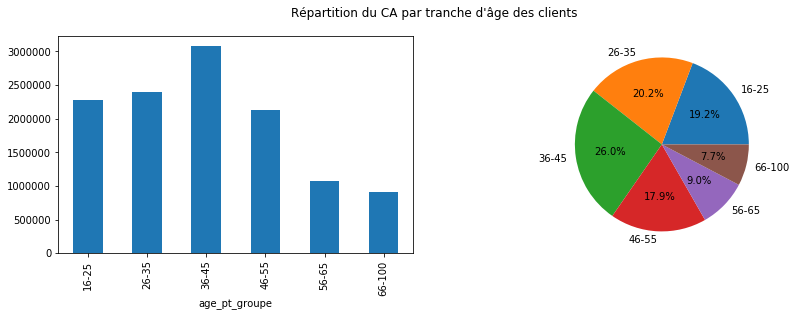

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Répartition du CA par tranche d'âge des clients \n")
sales.groupby('age_pt_groupe')['price'].sum().plot.bar(ax=axes[0])
sales.groupby('age_pt_groupe')['price'].sum().plot.pie(autopct='%1.1f%%', ax=axes[1])
plt.ylabel("")
plt.show()

In [68]:
sales.groupby('age_pt_groupe')['price'].sum()

age_pt_groupe
16-25    2280261.600
26-35    2389579.200
36-45    3077776.580
46-55    2122604.660
56-65    1071809.600
66-100    911697.040
Name: price, dtype: float64

<div id="section_4_2"><h3 style="color:#AA2E22">Évolution du CA dans le temps</h3></div>

#### Définir l'année fiscale

On va à présent définir les dates de début et de fin de l'exercice fiscal

In [69]:
# Définir les dates de début et de fin de l'analyse
starting_date = sales['date'].dt.date.min()
ending_date = sales['date'].dt.date.max()
# Calculer le périmètre temporel de l'analyse
duration = (ending_date - starting_date).days
print("L'analyse se fait sur une période de", duration, "jours")
print("Elle commence le",  starting_date, "et se termine le", ending_date)

L'analyse se fait sur une période de 729 jours
Elle commence le 2021-03-01 et se termine le 2023-02-28


L'exercice fiscal commence le 1er mars et se termine le 28ème février. L'analyse se fait alors dans un délai de deux années fiscales.

On va maintenant identifier le trimestre et l'année fiscale de chaque transaction.

In [70]:
# Le premier trimestre commence en mars
sales['quarter'] = sales['date'].dt.to_period('Q-FEB') # ici on donne la date de fin de l'exercice fiscal

In [71]:
sales['fiscal_year'] = sales['quarter'].dt.qyear

#### Évolution du CA par an

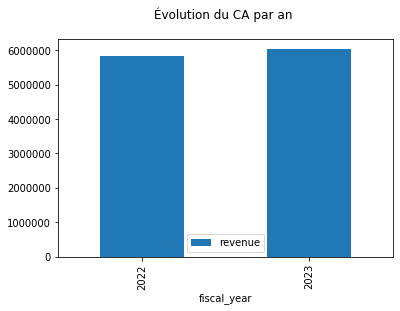

In [72]:
yearly_sales = sales.groupby('fiscal_year')['price'].sum().reset_index(name='revenue')
yearly_sales.plot(kind='bar', x='fiscal_year', y='revenue', title='Évolution du CA par an \n')
plt.show()

In [73]:
yearly_sales

,fiscal_year,revenue
0,2022,5831737.050
1,2023,6021991.630


In [74]:
yearly_growth = yearly_sales.iloc[1, 1] - yearly_sales.iloc[0, 1]
print(f"La croissance du CA entre 2022 et 2023 atteint {round(yearly_growth, 2)}")

La croissance du CA entre 2022 et 2023 atteint 190254.58


On remarque **une petite croissance du chiffre d'affaires par 190254 entre 2022 en 2023.**

#### Évolution du CA par trimestre

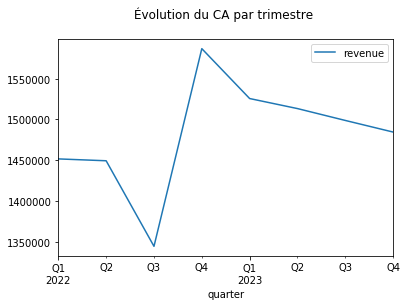

In [75]:
quarterly_sales = sales.groupby('quarter')['price'].sum().reset_index(name='revenue')
quarterly_sales.plot(x='quarter', y='revenue', title='Évolution du CA par trimestre \n')
plt.show()

Les ventes trimestrielles n'étaient pas assez stables au cours de la première année fiscale 2022, avec un creux au 3ème trimestre et un pic au 4ème trimestre. **On apérçoit aussi une tendance de baisse des ventes au cours de la deuxième année fiscales 2023**. Cela pourrait être un signe alarmant.

In [76]:
quarterly_sales

,quarter,revenue
0,2022Q1,1451493.380
1,2022Q2,1449208.750
2,2022Q3,1344207.150
3,2022Q4,1586827.770
4,2023Q1,1525588.070
5,2023Q2,1513266.510
6,2023Q3,1498697.240
7,2023Q4,1484439.810


#### Évolution du CA par mois

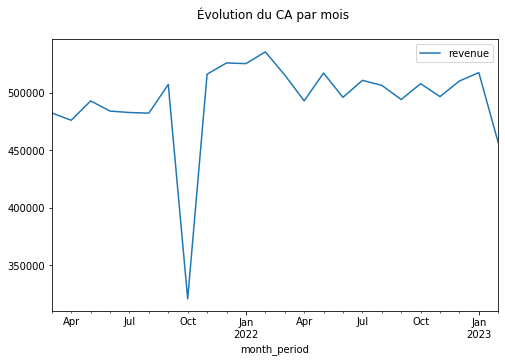

In [77]:
monthly_sales = sales.groupby(['fiscal_year', sales.date.dt.to_period('M')])['price'].sum().reset_index()
monthly_sales.rename(columns={'date':'month_period', 'price':'revenue'}, inplace=True)
monthly_sales.plot(x='month_period', y='revenue', title='Évolution du CA par mois \n', figsize=(8, 5))
plt.show()

Aperçus intéressants : 
- Le CA mensuel est plus au moins stable au niveau global, surtout entre mars 2022 et janvier 2022,
- On constate un creux considérable (à 320798), et probablement artificielle, au mois d'octobre 2021. Cela pourrait être à cause d'un problème technique survenu sur le site Web. Pour notre référence, on va détecter et lister ces jours.
- On constate également un pic (à 535571) au mois de février 2022
- Le mois dernier, février, est le pire en termes de chiffre d'affaires (à 456679), en effet, celui-ci a atteint en février 2023 son niveau le plus bas jamais enregistré (hors octobre 2022).

In [78]:
monthly_sales

,fiscal_year,month_period,revenue
0,2022,2021-03,482440.610
1,2022,2021-04,476109.300
2,2022,2021-05,492943.470
3,2022,2021-06,484088.560
4,2022,2021-07,482835.400
5,2022,2021-08,482284.790
6,2022,2021-09,507240.680
7,2022,2021-10,320798.740
8,2022,2021-11,516167.730
9,2022,2021-12,525917.280


#### Comparaison du CA entre les années fiscales 2022 et 2023, mois par mois

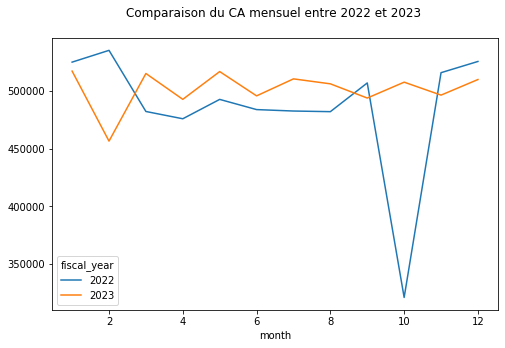

In [79]:
df = sales.groupby(['fiscal_year', sales.date.dt.month])['price'].sum().reset_index()
df.rename(columns={'date':'month', 'price':'revenue'}, inplace=True)
df.pivot(index='month', columns='fiscal_year', values='revenue').plot(figsize=(8, 5))
plt.title("Comparaison du CA mensuel entre 2022 et 2023 \n")
plt.show()

Aperçus intéressants : 
- Pendant les mois de mars à aout, la performance des ventes a été plus élevée en 2023 qu'en 2022. Cependant, la performance a été inférieure en 2023 à celle de 2022 pendant les mois de septembre à février (hors octobre).
- Le mois de février est tellement intéressant puisqu'on constate les deux extrêmes, autrement dit, les performances les plus élevées et les plus basses jamais enregistrées en 2022 et 2023, respectivement.

#### CA par jour

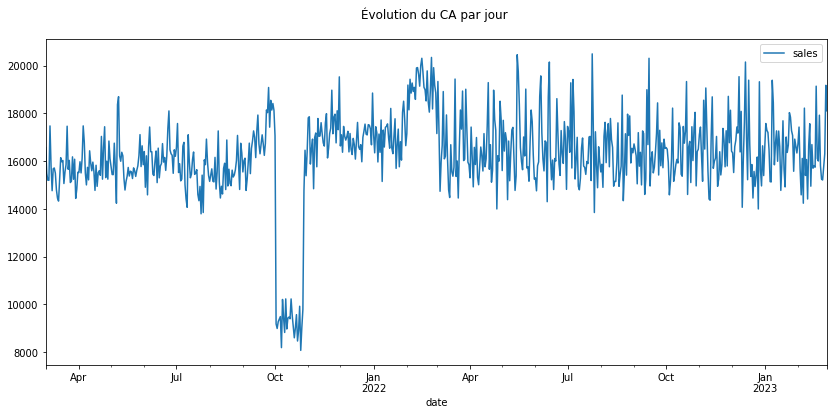

In [80]:
daily_sales = sales.groupby(sales.date.dt.date)['price'].sum().reset_index(name='sales')
daily_sales["date"] = pd.to_datetime(daily_sales["date"])

daily_sales.set_index('date').plot(figsize=(14, 6))

plt.title("Évolution du CA par jour \n")
plt.show()

Là, encore une fois, on remarque une chute soudaine de CA durant le mois d'octobre en 2022. On va utiliser le formule statistique IQR pour détecter ces jours-ci et même les autres jours ou le chiffre d'affaires a été anormal.

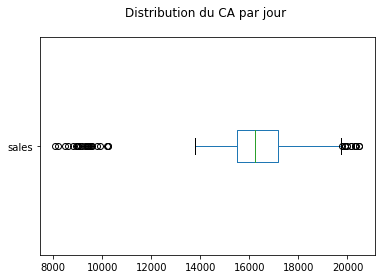

In [81]:
daily_sales.sales.plot(kind='box', vert=False, title="Distribution du CA par jour \n")
plt.show()

In [82]:
# Calculer le premier quartile Q1 de daily_sales ds_q1
ds_q1 = daily_sales.sales.quantile(0.25)
# Calculer le troisième quartile Q3 de daily_sales ds_q3
ds_q3 = daily_sales.sales.quantile(0.75)
# Calculer l'écart interquartile IQR
ds_iqr = ds_q3 - ds_q1

In [83]:
# détecter et lister les jours avec le volume de ventes le plus faible
lowest_sale_days = daily_sales[daily_sales['sales'] < (ds_q1 - 1.5 * ds_iqr)]
lowest_sale_days.sort_values('sales').head()

,date,sales
238,2021-10-25,8076.040
220,2021-10-07,8191.080
235,2021-10-22,8467.860
232,2021-10-19,8601.710
223,2021-10-10,8825.650


In [84]:
# détecter et lister les jours avec le volume de ventes le plus élevé
highest_sale_days = daily_sales[daily_sales['sales'] > (ds_q3 + 1.5 * ds_iqr)]
highest_sale_days.sort_values('sales', ascending=False).head()

,date,sales
510,2022-07-24,20487.680
440,2022-05-15,20451.870
360,2022-02-24,20338.700
351,2022-02-15,20302.890
563,2022-09-15,20302.890


#### Évolution du CA par jour en moyenne mobile (sur 30, 90 et 240 jours)

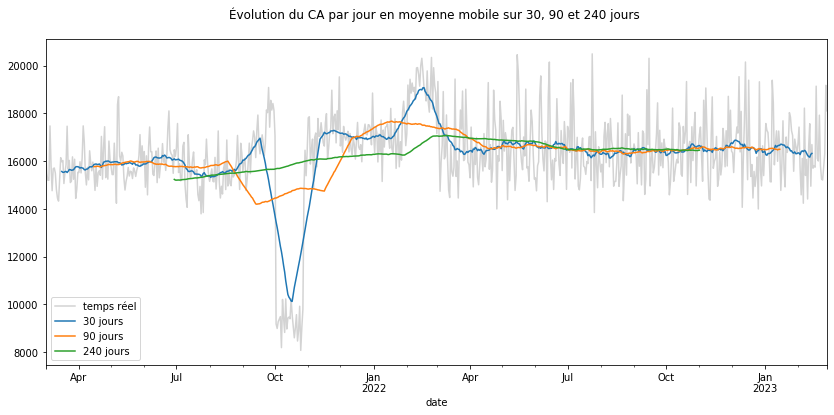

In [85]:
days_windows = [30, 90, 240]

plt.figure(figsize=(14, 6))
plt.title(f'Évolution du CA par jour en moyenne mobile sur 30, 90 et 240 jours \n')

daily_sales.set_index('date')['sales'].plot(label='temps réel', c='lightgrey')

for window in days_windows:
    daily_sales.set_index('date')['sales'].rolling(window=window, center=True).mean().plot(x='date', y='sales', label=f'{window} jours')
    
plt.legend()
plt.show()

Aperçus intéressants :
- La tendance globale du CA semble plutôt stable surtout en cours de la dernière année.
- Il y a un pic notable en février 2022.
- Il y a un creux considérable, voire artificiel, en novembre 2021.
- On peut aussi apercevoir qu'il y a un changement de comportement entre les deux années fiscales. L'année 2021-2022 se caractérise par une forte variabilité, avec un pic et un creux, tandis que l'année 2022-2023 se caractérise par une stabilité notable avec moins de variabilité, sans pic ni creux.

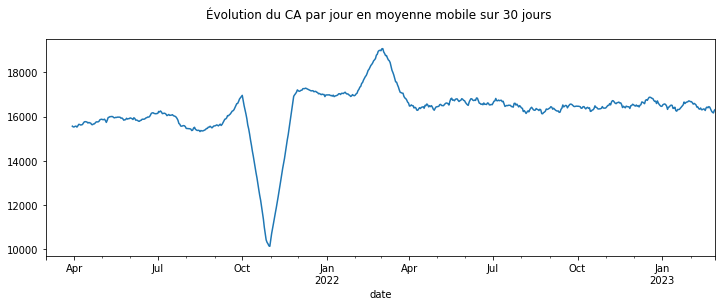

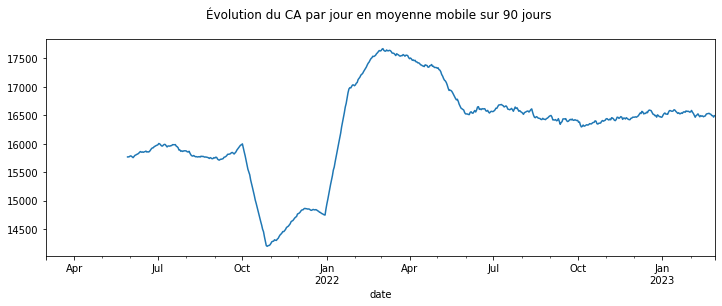

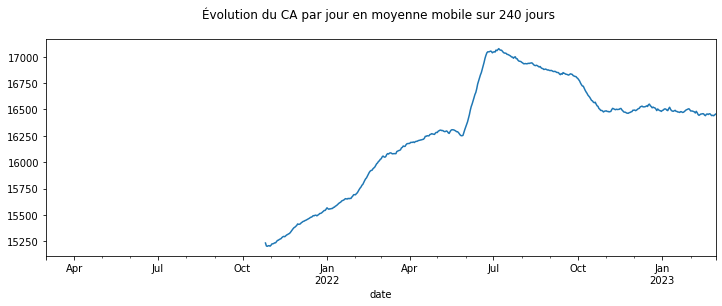

In [86]:
for window in days_windows:
    plt.figure(figsize=(12, 4))
    plt.title(f'Évolution du CA par jour en moyenne mobile sur {window} jours \n')
    daily_sales.set_index('date')['sales'].rolling(window=window).mean().plot()

plt.show()

Aperçus intéressants : 
- L'évolution en moyenne mobile avec une fenêtre à 30 jours et celle à 90 jours montre un CA plutôt stable surtout au cours de la deuxième année fiscales.
- L'évolution en moyenne mobile avec une fenêtre à 240 jours, montre un changement important de tendance entre les deux années fiscales. En effet, on remarque un tournant en mois de juillet 2022. Avant, la tendance s'est caractérisée par une forte croissance jusqu'au pic en juillet 2022. Puis, on voit de plus en plus une tendance de baisse jusqu'à présent.

#### CA moyen par jour de la semaine

In [87]:
# Mettre les jours de la semaine en ordre
weekdays_sorted = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

avg_weekday_sales = daily_sales.groupby(daily_sales.date.dt.day_name())['sales'].mean().reindex(weekdays_sorted)

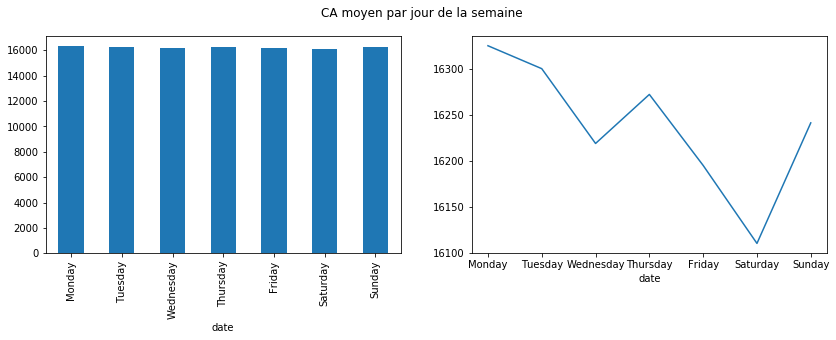

Range :  214.65877838828237


In [88]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('CA moyen par jour de la semaine \n')
avg_weekday_sales.plot(kind='bar', ax=axes[0])
avg_weekday_sales.plot(ax=axes[1])
plt.show()
print("Range : ", avg_weekday_sales.max() - avg_weekday_sales.min())

Les ventes moyennes par jours de la semaine sont réparties assez uniformément. On observe un pic les lundis et un creux les samedis, néanmoins avec un intervalle très étroit (environs 214).

<div id="section_4_3"><h3 style="color:#AA2E22">Zoom sur les références</h3></div>

#### Taux des produits stagnants

In [89]:
a = stagnant_products.id_prod.size
b = products.id_prod.size
c = round((a / b) * 100, 2)
print(f'Au cours des deux dernières années, seulement {c} % des produits étaient stagnants.')

Au cours des deux dernières années, seulement 0.64 % des produits étaient stagnants.


Plus de 99 % des produits sont actifs, c'est impressionnant !

In [90]:
# supprimer les produits stagnants pour ne pas influencer l'analyse
product_metrics = products.loc[~products.id_prod.isin(stagnant_products.id_prod)].copy()

#### Calcul de quelques métriques

In [91]:
# Calculer la quantité totale vendue de chaque produit 
df = sales.groupby('id_prod').size().reset_index(name='qty_sold')
product_metrics = pd.merge(product_metrics, df, how='left', on='id_prod')

In [92]:
# Calculer le revenu généré par chaque produit
product_metrics['sales'] = product_metrics['price'] * product_metrics['qty_sold']

In [93]:
# Calculer la dernière date de vente pour chaque produit date_ls (date of last sale)
df = sales.groupby('id_prod')['date'].max().reset_index(name='date_ls')
product_metrics = pd.merge(product_metrics, df, how='left', on='id_prod')

In [94]:
# Calculer l'âge moyen des acheteurs - âge au moment d'achat
df = sales.groupby('id_prod')['age_pt'].mean().round(2).reset_index(name='avg_client_age_pt')
product_metrics = pd.merge(product_metrics, df, how='left', on='id_prod')

#### Top ventes par quantité vendue

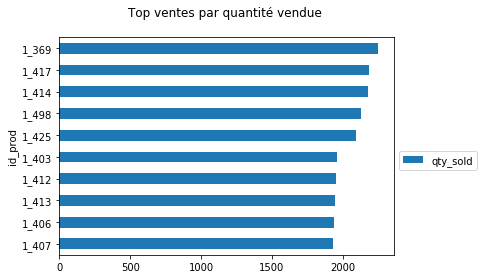

In [95]:
product_metrics.sort_values('qty_sold').tail(10).plot(kind='barh', x='id_prod', y='qty_sold')
plt.title('Top ventes par quantité vendue \n')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [96]:
product_metrics.sort_values('qty_sold', ascending=False).head(10)

,id_prod,price,categ,qty_sold,sales,date_ls,avg_client_age_pt
2628,1_369,23.990,1,2252,54025.480,2023-02-28 16:32:21.433069,48.110
2184,1_417,20.990,1,2189,45947.110,2023-02-28 23:45:54.817107,46.770
2201,1_414,23.830,1,2180,51949.400,2023-02-28 17:50:04.725589,48.150
2867,1_498,23.370,1,2128,49731.360,2023-02-28 08:32:32.486023,46.960
1033,1_425,16.990,1,2096,35611.040,2023-02-28 19:28:22.821734,47.900
737,1_403,17.990,1,1960,35260.400,2023-02-28 23:34:19.656966,47.210
2569,1_412,16.650,1,1951,32484.150,2023-02-28 18:57:32.397343,46.870
3219,1_413,17.990,1,1945,34990.550,2023-02-28 20:07:25.373428,48.080
1537,1_406,24.810,1,1939,48106.590,2023-02-28 09:53:19.169828,46.880
1317,1_407,15.990,1,1935,30940.650,2023-02-28 08:49:29.104072,46.720


À noter que tous les tops ventes par quantité appartiennent à une seule catégorie. C'est la catégorie 1.

#### Top ventes par CA

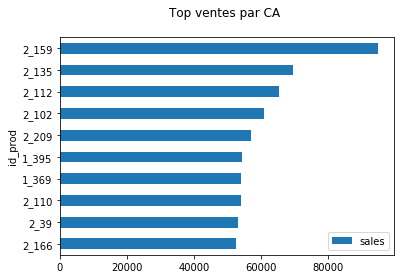

In [97]:
product_metrics.sort_values('sales').tail(10).plot(kind='barh', x='id_prod', y='sales')
plt.title('Top ventes par CA \n')
plt.show()

In [98]:
product_metrics.sort_values('sales', ascending=False).head(10)

,id_prod,price,categ,qty_sold,sales,date_ls,avg_client_age_pt
1306,2_159,145.990,2,650,94893.500,2023-02-27 22:23:10.177419,39.720
2652,2_135,68.990,2,1005,69334.950,2023-02-28 03:09:20.257129,26.250
463,2_112,67.570,2,968,65407.760,2023-02-27 15:34:47.016951,25.090
2329,2_102,59.140,2,1027,60736.780,2023-02-28 21:45:26.670082,25.670
490,2_209,69.990,2,814,56971.860,2023-02-26 01:26:55.858151,25.450
1733,1_395,28.990,1,1875,54356.250,2023-02-28 11:21:01.222687,47.490
2628,1_369,23.990,1,2252,54025.480,2023-02-28 16:32:21.433069,48.110
2443,2_110,62.250,2,865,53846.250,2023-02-28 08:15:49.548834,25.420
2387,2_39,57.990,2,915,53060.850,2023-02-28 13:25:16.393453,25.090
2469,2_166,230.040,2,228,52449.120,2023-02-26 08:56:13.606952,26.640


À noter que la majorité (8 sur 10) de tops ventes par CA appartient à la catégorie 2.

#### Flop ventes par CA

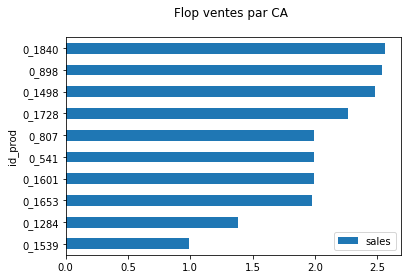

In [99]:
product_metrics.sort_values('sales').head(10).plot(kind='barh', x='id_prod', y='sales')
plt.title('Flop ventes par CA \n')
plt.show()

In [100]:
product_metrics.sort_values('sales', ascending=False).tail(10)

,id_prod,price,categ,qty_sold,sales,date_ls,avg_client_age_pt
934,0_1840,1.280,0,2,2.560,2023-01-06 06:09:13.114329,44.000
1798,0_898,1.270,0,2,2.540,2021-12-12 20:12:09.122337,47.500
2696,0_1498,2.480,0,1,2.480,2022-02-19 08:31:04.439133,43.000
1442,0_1728,2.270,0,1,2.270,2021-04-19 13:48:18.949260,32.000
1727,0_807,1.990,0,1,1.990,2021-07-24 17:43:23.555852,30.000
2981,0_541,1.990,0,1,1.990,2021-03-08 23:45:11.524853,36.000
2793,0_1601,1.990,0,1,1.990,2021-03-07 18:55:24.042724,49.000
2513,0_1653,0.990,0,2,1.980,2022-08-08 03:36:48.375653,64.000
2812,0_1284,1.380,0,1,1.380,2021-04-14 13:13:06.560397,49.000
1896,0_1539,0.990,0,1,0.990,2021-06-01 08:53:24.523722,33.000


À noter que tous les flops ventes par CA appartiennent à la catégorie 0.

#### Répartition du CA par catégorie

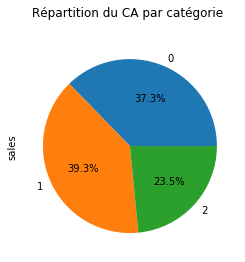

In [101]:
product_metrics.groupby(['categ'])['sales'].sum().plot(kind='pie', autopct='%.1f%%')
plt.title('Répartition du CA par catégorie \n')
plt.show()

#### Matrice de corrélation

Avant de procéder à l'analyse des profils clients, il convient de faire une petite analyse sur la corrélation potentielle entre les différentes variables quantitatives de la table product_metrics. Pour cela, on va utiliser la matrice de corrélation.

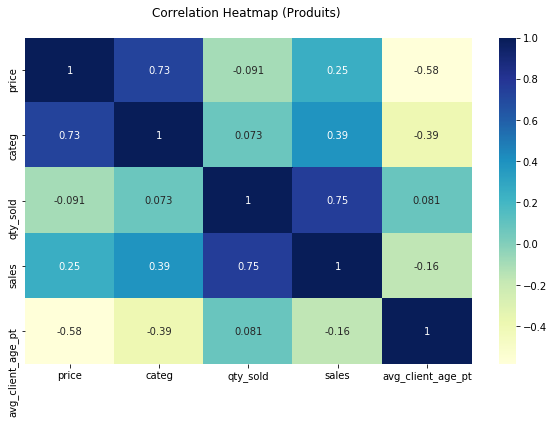

In [102]:
plt.figure(figsize=(10, 6))
sns.heatmap(product_metrics.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap (Produits) \n")
plt.show()

Aperçus intéressants :
- Il y une corrélation entre la catégorie d'un produit et son prix. 
- Il y une faible corrélation entre la catégorie d'un produit et l'âge du client. 
- Il n'y a pas une corrélation entre le prix d'un produit et la quantité vendue.

#### Corrélation entre la catégorie d'un produit et son prix

##### Test de normalité : test d'ajustement de d'Agostino

In [103]:
s2k2, p = st.normaltest(product_metrics.price)
print("Résultat du test d'ajustement de d'Agostino pour la variable age_pt")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable age_pt
S2 + K2 : 2618.089943349377, p-value : 0.0


La p-value est 0, cela signifie que la variable price ne suit pas une distribution normale.

##### Test de corrélation : test de Kruskal-Wallis (non paramétrique)

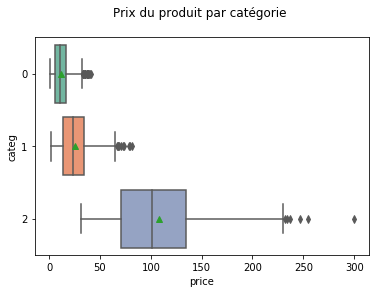

In [104]:
sns.boxplot(x='price', y='categ', data=product_metrics, orient='h', showmeans=True, palette='Set2')
plt.title("Prix du produit par catégorie \n")
plt.show()

In [105]:
h, p = st.kruskal(product_metrics['price'][product_metrics['categ'] == 0], 
                    product_metrics['price'][product_metrics['categ'] == 1],
                    product_metrics['price'][product_metrics['categ'] == 2])
print(f"H-Stat : {h}, p-value : {p}")

H-Stat : 1123.9918647937998, p-value : 8.477498233489316e-245


La p-value est extrêmement petit, moins de 0.05, le H est très grand, on peut alors dire qu'il y a une différence statiquement significative entre la catégorie d'un livre et son prix.

<p style="border: solid #ff7366; padding:2rem; border-radius: 5px; text-align: center"><strong style="color:#AA2E22">Conclusion : </strong>Il y a une forte corrélation entre la catégorie d'un produit et son prix.</p>

<div id="section_4_4"><h3 style="color:#AA2E22">Zoom sur les profils clients</h3></div>

#### Taux de clients actifs

In [106]:
a = inactive_customers.client_id.size
b = customers.client_id.size
c = round(((b - a) / b) * 100, 2)
print(f'Au cours des deux dernières années, {c} % des clients étaient actifs.')

Au cours des deux dernières années, 99.76 % des clients étaient actifs.


99.73 des clients sont actifs, c'est impressionnant !

In [107]:
# supprimer les clients inactifs pour ne pas influencer l'analyse
customer_profiles = customers.loc[~customers.client_id.isin(inactive_customers.client_id)].copy()

#### Calcul de quelques métriques

In [108]:
# Calculer l'âge des client à la date de la dernière transaction (2023)
ref_year = sales.date.dt.year.max() # fixer l'année de référence
customer_profiles['age_'+str(ref_year)] = ref_year - customer_profiles['birth']

In [109]:
# les tranches d'âge ci-dessous sont adaptées de l'INSEE (étude sur la pratique de la lecture) 
age_bins = [15, 25, 35, 45, 55, 65, 100] # Définir les tranches
age_bins_labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '66-100'] # Libeller les tranches
customer_profiles['age_groupe_2023'] = pd.cut(customer_profiles['age_2023'], age_bins, labels=age_bins_labels) # discrétisation

In [110]:
# Calculer la quantité de produits achetés par chaque client 
df = sales.groupby('client_id')['id_prod'].count().reset_index(name='qty_bought')
customer_profiles = pd.merge(customer_profiles, df, how='left', on='client_id')

In [111]:
# Calculer le chiffre s'affaires généré par chaque client
df = sales.groupby('client_id')['price'].sum().reset_index(name='sales')
customer_profiles = pd.merge(customer_profiles, df, how='left', on='client_id')

#### Top 10 clients par CA généré

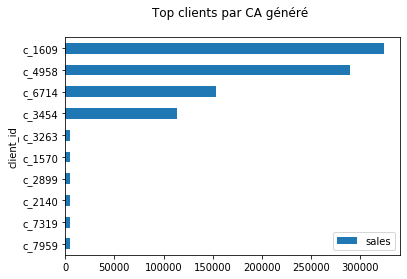

In [112]:
customer_profiles.sort_values('sales').tail(10).plot(kind='barh', x='client_id', y='sales')
plt.title('Top clients par CA généré \n')
plt.show()

In [113]:
customer_profiles.sort_values('sales', ascending=False).head(10)

,client_id,sex,birth,age_2023,age_groupe_2023,qty_bought,sales
3633,c_1609,m,1980,43,36-45,25488,324033.350
1377,c_4958,m,1999,24,16-25,5195,289760.340
1910,c_6714,f,1968,55,46-55,9181,153598.920
8067,c_3454,m,1969,54,46-55,6770,113637.930
4713,c_3263,f,1985,38,36-45,403,5276.870
1483,c_1570,f,1979,44,36-45,369,5271.620
3932,c_2899,f,1994,29,26-35,105,5214.050
612,c_2140,f,1977,46,46-55,402,5208.820
5134,c_7319,f,1974,49,46-55,371,5155.770
368,c_7959,f,1974,49,46-55,369,5085.450


On voit qu'il y a 4 clients qui ont fait de très gros achats. Ce sont probablement des professionnels ou des entreprises. Donc, il est important de distinguer entre deux segments de clientèle : consommateur et professionnel. Éventuellement, on peut effectuer une analyse personnalisée pour chaque segment. 

In [114]:
customer_profiles['segment'] = 'conso'

In [115]:
s = customer_profiles.sort_values('sales', ascending=False).head(4).client_id
customer_profiles.loc[customer_profiles.client_id.isin(s), 'segment'] = 'pro'

In [116]:
customer_profiles.segment.value_counts()

conso    8596
pro         4
Name: segment, dtype: int64

In [117]:
# diviser les profils des clients en deux segments : les clients conso et les clients pro
ccp = customer_profiles.loc[customer_profiles.segment == 'conso'].copy() # consumer customer profiles
pcp = customer_profiles.loc[customer_profiles.segment == 'pro'].copy() # pro customer profiles

#### Top 10 clients consommateurs par CA généré

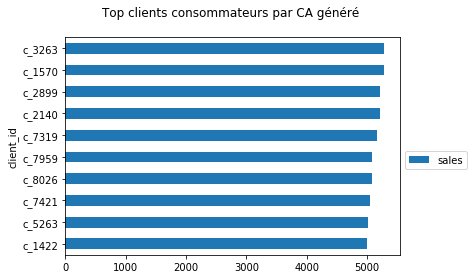

In [118]:
ccp.sort_values('sales').tail(10).plot(kind='barh', x='client_id', y='sales')
plt.title('Top clients consommateurs par CA généré \n')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

#### Top 10 clients consommateurs par quantité acheté

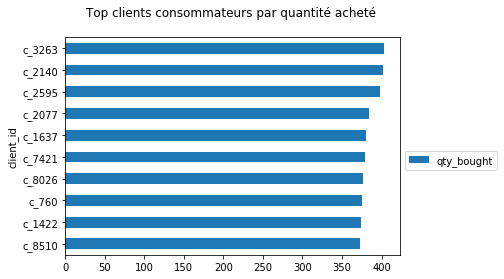

In [119]:
ccp.sort_values('qty_bought').tail(10).plot(kind='barh', x='client_id', y='qty_bought')
plt.title('Top clients consommateurs par quantité acheté \n')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

#### Flop 10 clients consommateurs par CA généré

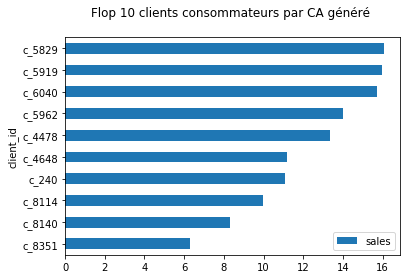

In [120]:
ccp.sort_values('sales').head(10).plot(kind='barh', x='client_id', y='sales')
plt.title('Flop 10 clients consommateurs par CA généré \n')
plt.show()

In [121]:
customer_profiles.sort_values('sales', ascending=False).tail(10)

,client_id,sex,birth,age_2023,age_groupe_2023,qty_bought,sales,segment
3164,c_5829,f,1989,34,26-35,2,16.070,conso
2606,c_5919,f,1955,68,66-100,2,15.980,conso
5472,c_6040,f,1974,49,46-55,2,15.720,conso
7595,c_5962,f,1997,26,26-35,1,13.990,conso
3276,c_4478,f,1970,53,46-55,1,13.360,conso
1553,c_4648,m,2004,19,16-25,1,11.200,conso
6299,c_240,m,1998,25,16-25,1,11.060,conso
2462,c_8114,m,1962,61,56-65,2,9.980,conso
2717,c_8140,m,1971,52,46-55,2,8.300,conso
2169,c_8351,f,1968,55,46-55,1,6.310,conso


#### Répartition du chiffre d'affaires par segment de clientèle

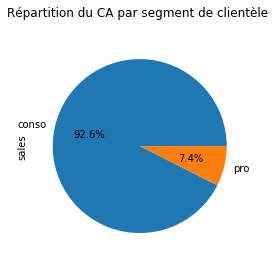

In [122]:
customer_profiles.groupby('segment')['sales'].sum().plot(kind='pie', autopct='%.1f%%')
plt.title("Répartition du CA par segment de clientèle \n")
plt.show()

#### Répartition du chiffre d'affaires entre les clients consommateurs

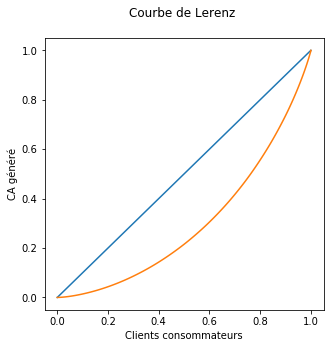

In [123]:
cc_sales = ccp['sales']
n = len(cc_sales)
lorenz = np.cumsum(np.sort(cc_sales)) / cc_sales.sum()
lorenz = np.append([0], lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n, 1+1/n, n+1)

plt.figure(figsize=(5, 5))
plt.plot([0, 0.2, 0.4, 0.6, 0.8, 1], [0, 0.2, 0.4, 0.6, 0.8, 1])
plt.plot(xaxis, lorenz, drawstyle='steps-post')
plt.title("Courbe de Lerenz \n")
plt.xlabel('Clients consommateurs')
plt.ylabel('CA généré')
plt.show()

On peut principalement tirer les conclusions suivantes à partir de la courbe de Lorenz ci-dessus :
- 20% de clients consommateurs génèrent presque 45% du chiffre d'affaires, 
- et 25% génèrent presque 60%. 
- 80% du chiffre d'affaires viennent de 50% de clients consommateurs.

In [124]:
# Calcul de la surface sous la courbe de Lorenz.
a = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
# Calcul de surface entre la première bissectrice et le courbe de Lorenz
b = 0.5 - a 
gini = 2 * b
print('Indice de Gini :', round(gini, 2))

Indice de Gini : 0.4


L'indice de Gini montre aussi que la distribution du CA entre les clients n'est pas uniforme. Autrement dit, la répartition du CA n'est pas égalitaire.

#### Répartition du CA par genre du client consommateur

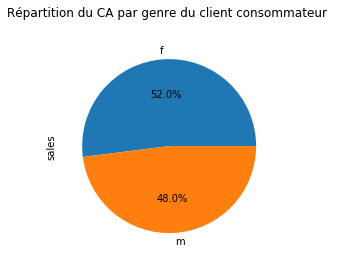

In [125]:
ccp.groupby('sex')['sales'].sum().plot(kind='pie', autopct='%.1f%%')
plt.title("Répartition du CA par genre du client consommateur \n")
plt.show()

#### Répartition des clients consommateurs par genre

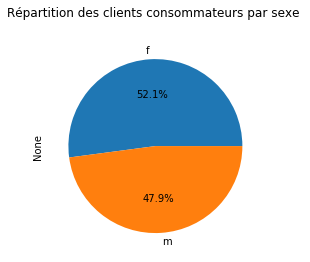

In [126]:
ccp.groupby('sex').size().plot(kind='pie', autopct='%.1f%%')
plt.title('Répartition des clients consommateurs par sexe \n')
plt.show()

#### Répartition des clients consommateurs par âge actuel (Âge en 2023)

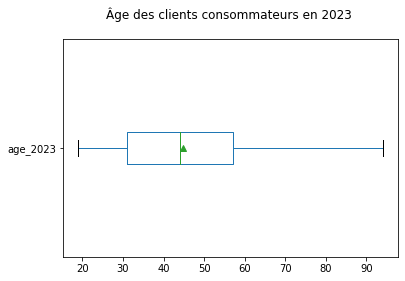

Moyen : 44.74
Médiane : 44.0


In [127]:
ccp.age_2023.plot(kind='box', vert=False, showmeans=True)
plt.title("Âge des clients consommateurs en 2023 \n")
plt.show()
print("Moyen :", round(ccp.age_2023.mean(), 2))
print("Médiane :", ccp.age_2023.median())

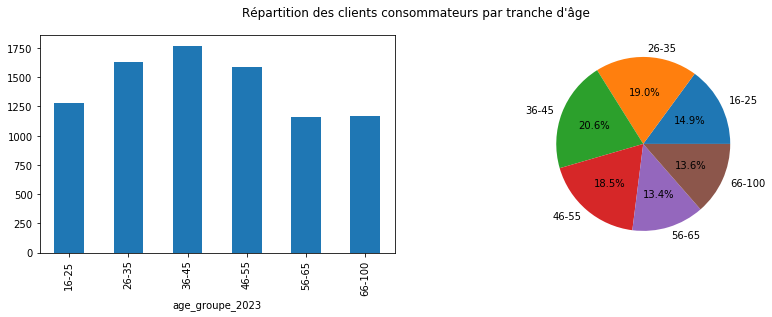

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Répartition des clients consommateurs par tranche d'âge \n")
ccp.groupby('age_groupe_2023').size().plot(kind='bar', ax=axes[0])
ccp.groupby('age_groupe_2023').size().plot(kind='pie', autopct='%.1f%%', ax=axes[1])
plt.ylabel("")
plt.show()

<div id="section_5"><h2 style="background-color:#ff7366; padding:2rem; color:white; text-transform: uppercase">Demandes de Julie : Analyse des profils clients</h2></div>

<div id="section_5_0"><h3 style="color:#AA2E22">Préparation des données pour l'analyse</h3></div>

#### Calcul de quelques metriques

In [129]:
# Calculer le nombre de paniers de chaque client 
df = sales.groupby('client_id')['session_id'].nunique().reset_index(name='baskets')
customer_profiles = pd.merge(customer_profiles, df, how='left', on='client_id')

In [130]:
# Calculer la première date d'achat effectué pour chaque client (date_fp: date of first purchase)
df = sales.groupby('client_id')['date'].min().reset_index(name='date_fp')
customer_profiles = pd.merge(customer_profiles, df, how='left', on='client_id')

In [131]:
# Calculer la durée de vie actuelle d'un client en jours (ccl: current customer lifetime)
customer_profiles['ccl'] = ending_date - customer_profiles['date_fp'].dt.date

In [132]:
# Calculer la fréquence d'achat par an pour chaque client (freq_y: frequency per yaer)
customer_profiles['freq_y'] = round(customer_profiles['baskets'] * 365 / customer_profiles['ccl'].dt.days, 1)

In [133]:
# Calculer le montant moyen d'achat par jour (avg_spy: average sales per yar)
customer_profiles['avg_spy'] = customer_profiles['sales'] * 365 / customer_profiles['ccl'].dt.days

#### Création des DataFrames

In [134]:
# Mettre à jour les profils clients consommateurs
ccp = customer_profiles.loc[customer_profiles.segment == 'conso'].copy() # consommateur customer profiles

In [135]:
# selectionner uniquement les ventes de clients consommateurs (ics : Consumer Customer Sales)
ccs = sales.loc[sales.client_id.isin(ccp.client_id)].copy()

In [136]:
# Créer la DataFrame baskets
baskets = ccs.groupby(['session_id', 'client_id']).agg({'id_prod': 'count', 'price': 'sum', 'age_pt': 'first'})
baskets.columns = ['size', 'total', 'age_pt']
baskets = baskets.reset_index()

#### Analyse préliminaire

Avant de plonger dans une analyse approfondie des profils clients, jetons un coup d'œil sur la corrélation potentielle entre toutes les variables quantitatives au sein de la table profils clients consommateurs (ccp). On s'intéresse surtout à la corrélation entre l'âge d'un client et le CA (sales) et la corrélation entre l'âge et la fréquence d'achat par an (freq_y).

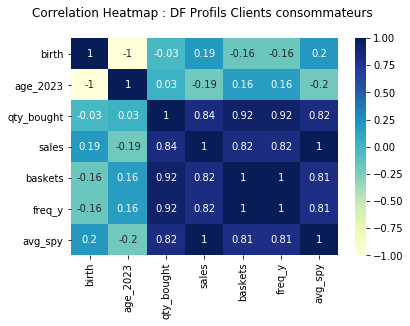

In [137]:
sns.heatmap(ccp.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap : DF Profils Clients consommateurs \n");

On ne trouve pas déjà une bonne corrélation entre l'âge et quasiment toutes les autres variables. On va toutefois effectuer une analyse poussée cas par cas.

#### Choix du risque d’erreur

Le choix de risque d'erreur est essentiel parce qu'il entraînera des conséquences directes sur la décision issue de différents tests statistiques qu'on va utiliser pour l'analyse du comportement des clients. Le risque d'erreur $\alpha$ peut avoir plusieurs valeurs en fonction de l'analyse et le domaine d'application. Les valeurs les plus courantes sont : 0.01, 0.02, 0.05, et 0.1. Pour cette analyse, on va choisir la valeur $\alpha = 0.05$ qui est les plus adoptée.

<div id="section_5_1"><h3 style="color:#AA2E22">1. Lien entre le genre d’un client et les catégories des livres achetés</h3></div>

Pour détécter un tel lien, il faut tester s'il existe une différence statistiquement significative entre deux varibales qualitatives. Le test statistique le plus pertinent est alors le test du Khi2.

#### Test du Khi2

##### Hypothèses de travail

Tout d'abord, il est essentiel de formuler les hypothèses de travail. En effet, il s'agit de deux hypothèses contradictoires :
- H0 - hypothèse dite nulle : Il n'y a pas un lien entre le genre d'un client et les catégories des livres achetés.
- H1 - hypothèse dite alternative : Il y a un lien entre le genre d'un client et les catégories des livres achetés.

##### Tableau de contingence : Effectifs observés

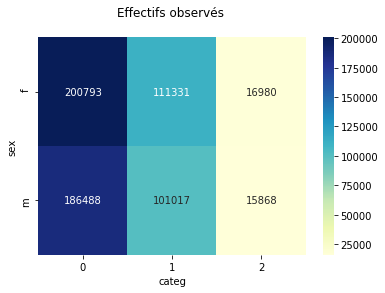

In [138]:
observed = pd.crosstab(ccs['sex'], ccs['categ'])
sns.heatmap(observed, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Effectifs observés \n")
plt.show()

In [139]:
# Créer le tableau de contingence avec le total
observed_total = pd.crosstab(ccs['sex'], ccs['categ'], margins=True, margins_name="Total")
observed_total

categ,0,1,2,Total
sex,,,,
f,200793,111331,16980,329104
m,186488,101017,15868,303373
Total,387281,212348,32848,632477


##### Tableau de contingence : Effectifs théoriques

Il s'agit des effectifs qui correspondent à l’hypothèse nulle (H0)

In [140]:
# Générer les effectifs théoriques
x = observed_total.loc[:, ["Total"]]
y = observed_total.loc[["Total"], :]
n = len(ccs)
expected = x.dot(y) / n
expected

categ,0,1,2,Total
sex,,,,
f,201518.358,110493.466,17092.176,329104.000
m,185762.642,101854.534,15755.824,303373.000
Total,387281.000,212348.000,32848.000,632477.000


##### Calcul du Khi2

In [141]:
chi2_table = (observed-expected)**2/expected # Khi2 calculé
chi2 = chi2_table.sum().sum() # Calcul de Khi2
print('Khi2 : ', round(chi2, 2))

Khi2 :  20.21


Le Khi2 calculé est 20.21. Le risque d'erreur est déjà fixé à $\alpha = 0.05$. Le degré de liberté (ddl) est 2. Selon la table de khi2, le khi2 théorique est 5,99. Bien entendu, le khi2 calculé est supérieur au khi2 théorique. On peut alors rejeter H0 et accepter H1. Donc, on peut dire qu'il y a un lien entre le genre d’un client et les catégories des livres achetés.

##### Calcul de la p-value

Il est aussi possible de calculer la p-value qui permet également de rejeter ou valider H0.

In [142]:
# Calcul de Khi2, ddl et p-value. 
c, p, dof, expected = st.chi2_contingency(observed) 
print('Khi2 :', round(c, 2))
print('p-value :', p)
print('ddl :', dof)

Khi2 : 20.21
p-value : 4.080400389217356e-05
ddl : 2


On remarque que la p-value est de loin inférieure au risque d'erreur 0.05. Cela permet aussi de rejeter H0 et valider H1.

<p style="border: solid #ff7366; padding:2rem; border-radius: 5px; text-align: center"><strong style="color:#AA2E22">Conclusion : </strong>Il y a un lien entre le genre d'un client et les catégories des livres achetés</p>

<div id="section_5_2"><h3 style="color:#AA2E22">2. Lien entre l’âge des clients et le montant total des achats</h3></div>

Avant de procéder à l'analyse, il est important de choisir le test statistique le plus pertinent. Les deux variables concernées sont quantitatives, il est essentiel pourtant de savoir si celles-ci suivent une distribution normale ou pas. Pour identifier la forme d'une variable, il existe deux manières : graphique et statistique (test d'ajustement).

#### Test de normalité

##### Tests graphiques

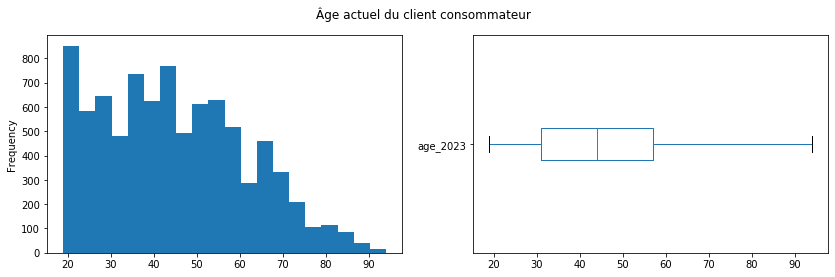

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Âge actuel du client consommateur \n")
ccp.age_2023.plot(kind='hist', bins=20, ax=axes[0])
ccp.age_2023.plot(kind='box', vert=False, ax=axes[1])
plt.show()

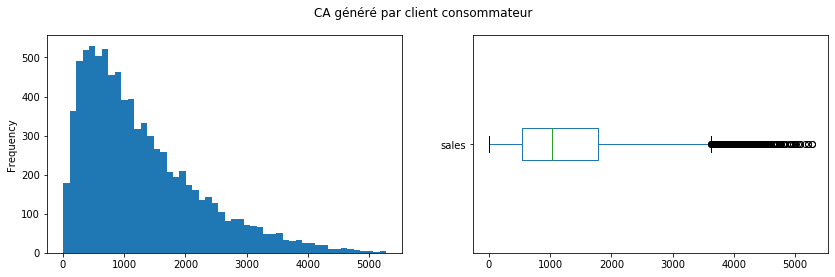

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("CA généré par client consommateur \n")
ccp.sales.plot(kind='hist', bins=50, ax=axes[0])
ccp.sales.plot(kind='box', vert=False, ax=axes[1])
plt.show()

Graphiquement, on s'aperçoit que la distribution des deux variables ne semble pas normale. Pour vérifier, on va appliquer un test statistique.

#####  Test d'ajustement de D'Agostino

Le test d'ajustement de D'Agostino semble le plus adapté puisqu'il donne des résultats plus précis quand la taille de l'échantillon dépasse le seuil de 5000 observations.

In [145]:
s2k2, p = st.normaltest(ccp.age_2023)
print("Résultat du test d'ajustement de d'Agostino pour la variable âge_2023")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable âge_2023
S2 + K2 : 504.23834085051436, p-value : 3.206531438222629e-110


La p-value est trop petite, ce qui signifie que la variable âge_2023 ne suit pas une distribution normale.

In [146]:
s2k2, p = st.normaltest(ccp.sales)
print("Résultat du test d'ajustement de d'Agostino pour la variable sales")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable sales
S2 + K2 : 1458.6693034353777, p-value : 0.0


La p-value est 0, cela signifie que la variable sales ne suit pas non plus une distribution normale.

Puisque les deux variables ne montrent pas une distribution normale, il faut choisir un test non paramétrique comme le test de corrélation de Spearman.

#### Tests de corrélation

##### Test de Spearman (non paramétrique)

In [147]:
st.spearmanr(ccp.age_2023, ccp.sales)

SpearmanrResult(correlation=-0.18513759917564593, pvalue=3.797551375418047e-67)

Étant donné que la valeur du coefficient de corrélation de Spearman est assez petite et négative (-0.185), mais la p-value est également très petite (moins de 0.05), on peut dire qu'il y a une corrélation entre l'âge et le montant total d'achats, mais celle-ci est à la fois négative et assez faible.

Puisqu'on a déjà discrétisé la variable quantitative age_2023 en variable qualitative age_groupe_2023, on peut appliquer un autre test. Le Test de Kruskal-Wallis qui est également un test non paramétrique.

##### Test  de Kruskal-Wallis (non paramétrique)

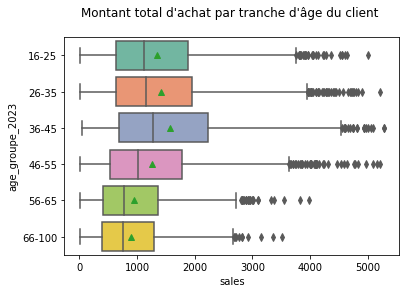

In [148]:
sns.boxplot(x='sales', y='age_groupe_2023', data=ccp, orient='h', showmeans=True, palette='Set2')
plt.title("Montant total d'achat par tranche d'âge du client \n")
plt.show()

In [149]:
h, p = st.kruskal(ccp['sales'][ccp['age_groupe_2023'] == '16-25'], 
           ccp['sales'][ccp['age_groupe_2023'] == '26-35'],
           ccp['sales'][ccp['age_groupe_2023'] == '36-45'], 
           ccp['sales'][ccp['age_groupe_2023'] == '46-55'],
           ccp['sales'][ccp['age_groupe_2023'] == '56-65'],
           ccp['sales'][ccp['age_groupe_2023'] == '66-100'])
print(f"H-Stat : {h}, p-value : {p}")

H-Stat : 463.42034229265266, p-value : 6.253758727413582e-98


La p-value est très petite, alors on peut parler de différence significative entres les groupes d'âge et le montant total d'achats. Autrement dit, il y a un lien entre l’âge d'un client et le montant total d'achat.

#### Régression linéaire

Pour effectuer une régression linéaire, on va regrouper les clients par âge en utilisant la fonction groupby et calculer la moyenne de leurs achats annuels.

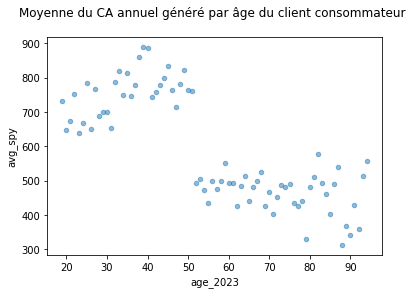

In [150]:
grouped = ccp.groupby('age_2023')['avg_spy'].mean().reset_index()
grouped.plot.scatter(x='age_2023', y='avg_spy', alpha=0.5)
plt.title("Moyenne du CA annuel généré par âge du client consommateur \n")
plt.show()

Au premier coup d'œil, on remarque qu'il y a deux clusters en fonction de l'âge des clients : le premier contient les clients de moins de 52 ans et le second contient les clients de plus de 52 ans. Chacun a un comportement assez différent.

In [151]:
x = grouped[['age_2023']]
y = grouped['avg_spy']
model = LinearRegression().fit(x, y)

a = model.coef_
b = model.intercept_
print(f"intercept : {b}")
print(f"coefficient : {a}")

r_sq = model.score(x, y)
print(f"coefficient de détermination : {r_sq}")

intercept : 904.6810084809684
coefficient : [-5.56487381]
coefficient de détermination : 0.6068176361456321


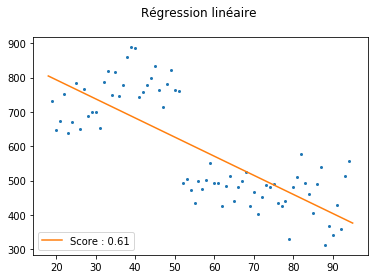

In [152]:
plt.plot(x, y, "o", markersize=2)
#plt.plot(x, model.predict(x))
plt.plot(np.arange(18, 96), [a*x+b for x in np.arange(18, 96)], label=f"Score : {model.score(x, y):.2f}")
plt.title("Régression linéaire \n")
plt.legend(loc="lower left")
plt.show()

Le coefficient de détermination est 0.61, ce qui signifie que le modèle de régression peut expliquer 61 % des points de données. On peut dire qu'il y a un lien entre l'âge d'un client et le montant total d'achat. Regardons si on peut obtenir de meilleurs résultats avec des régressions en blocs (Chunk regerssion).

##### Chunk regressions

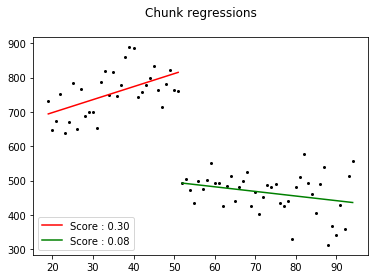

In [153]:
x1 = grouped.loc[grouped['age_2023'] < 52, ['age_2023']]
y1 = grouped.loc[grouped['age_2023'] < 52, 'avg_spy']

x2 = grouped.loc[grouped['age_2023'] >= 52, ['age_2023']]
y2 = grouped.loc[grouped['age_2023'] >= 52, 'avg_spy']

plt.plot(x, y, 'o', color='black', markersize=2)

couleurs = ['red', 'green']

for i in range(2):
    regr = LinearRegression()
    varx = eval("x" + str(i+1))
    vary = eval("y" + str(i+1))
    regr.fit(varx, vary)
    plt.plot(varx, regr.predict(varx), '-', color=couleurs[i], label=f"Score : {regr.score(varx,vary):.2f}")


plt.legend(loc="lower left")
plt.title("Chunk regressions\n")
plt.show()

Les scores des deux modèles en blocs sont de loin inférieurs à ce qu'on a obtenu avec le modèle général. Il vaut mieux alors garder le modèle général.

<p style="border: solid #ff7366; padding:2rem; border-radius: 5px; text-align: center"><strong style="color:#AA2E22">Conclusion : </strong>Il y a un lien entre l’âge d'un client et le montant total d'achat. La corrélation est pourtant assez faible et négative</p>

<div id="section_5_3"><h3 style="color:#AA2E22">3. Lien entre l’âge des clients et la fréquence d’achat</h3></div>

#### Test de normalité

##### Tests graphiques

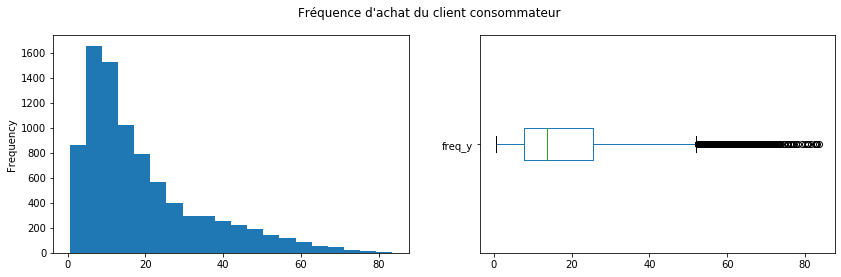

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Fréquence d'achat du client consommateur \n")
ccp.freq_y.plot(kind='hist', bins=20, ax=axes[0])
ccp.freq_y.plot(kind='box', vert=False, ax=axes[1])
plt.show()

Les tests montrent que la distribution de la variable freq_y ne semble pas normale.

#####  Test d'ajustement de D'Agostino

In [155]:
s2k2, p = st.normaltest(ccp.freq_y)
print("Résultat du test d'ajustement de d'Agostino pour la variable freq_y")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable freq_y
S2 + K2 : 1808.4746833507024, p-value : 0.0


La p-value du test de D'Agostino est 0, c-à-d, la variable freq_y ne suit pas une distribution normale.

#### Tests de corrélation

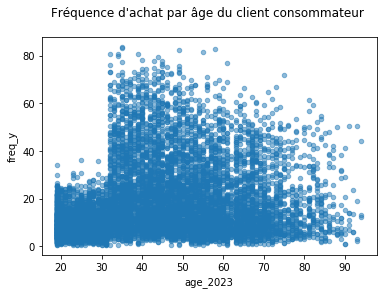

In [156]:
ccp.plot.scatter(x='age_2023', y='freq_y', alpha=0.5)
plt.title("Fréquence d'achat par âge du client consommateur \n")
plt.show()

On voit qu'il y a quelque chose de suspect concernant le saut de fréquence entre l'âge 32 et 33. Cela donne l'impression que les données ont été exposées à une modification involontaire ou probablement à une manipulation intentionnelle. Quelque chose à vérifier en effet.

##### Test de Spearman (non paramétrique)

In [157]:
st.spearmanr(ccp.age_2023, ccp.freq_y)

SpearmanrResult(correlation=0.21193635457451437, pvalue=6.985402005027431e-88)

Étant donné que la valeur du coefficient de corrélation de Spearman est assez petite (0.21), mais la p-value est aussi très petite (moins de 0.05), on peut dire qu'il y a une corrélation entre l'âge et la fréquence d'achat, mais cette corrélation est assez faible.

##### Test de Kruskal-Wallis (non paramétrique)

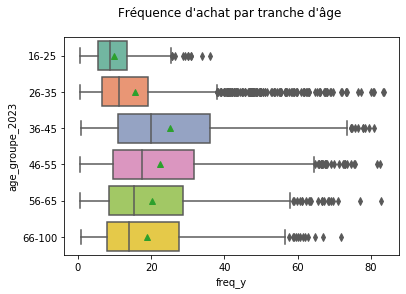

In [158]:
sns.boxplot(x='freq_y', y='age_groupe_2023', data=ccp, orient='h', showmeans=True, palette='Set2')
plt.title("Fréquence d'achat par tranche d'âge \n")
plt.show()

In [159]:
h, p = st.kruskal(ccp['freq_y'][ccp['age_groupe_2023'] == '66-100'], 
                            ccp['freq_y'][ccp['age_groupe_2023'] == '56-65'],
                            ccp['freq_y'][ccp['age_groupe_2023'] == '46-55'], 
                            ccp['freq_y'][ccp['age_groupe_2023'] == '36-45'],
                            ccp['freq_y'][ccp['age_groupe_2023'] == '26-35'],
                            ccp['freq_y'][ccp['age_groupe_2023'] == '16-25'])
print(f"H-Stat : {h}, p-value : {p}")

H-Stat : 969.0591193217662, p-value : 3.0003638491411818e-207


La p-value du test de Kruskal-Wallis est trop petite (moins de 0.05), le H est très grand, on peut alors parler d'une différence statiquement significative entres les groupes d'âge et la fréquence d'achat par an. Autrement dit, il y a un lien assez fort entre l’âge des clients et la fréquence d'achat.

#### Régression linéaire

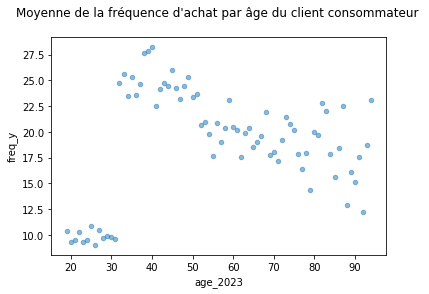

In [160]:
grouped = ccp.groupby('age_2023')['freq_y'].mean().reset_index()
grouped.plot.scatter(x='age_2023', y='freq_y', alpha=0.5)
plt.title("Moyenne de la fréquence d'achat par âge du client consommateur \n")
plt.show()

Le comportement suspect que nous avons déjà vu ci-avant se confirme également après le regroupement par âges. Un mouvement énorme et soudain de la variable freq_y est observé entre les âges avant et après 31. Un modèle de régression linéaire semble déjà très difficile à s'adapter aux différents points de donnée.

In [161]:
x = grouped[['age_2023']]
y = grouped['freq_y']
model = LinearRegression().fit(x, y)

a = model.coef_
b = model.intercept_
print(f"intercept : {b}")
print(f"coefficient : {a}")
r_sq = model.score(x, y)
print(f"coefficient de détermination : {r_sq}")

intercept : 16.692585143015645
coefficient : [0.03996861]
coefficient de détermination : 0.027699363715783742


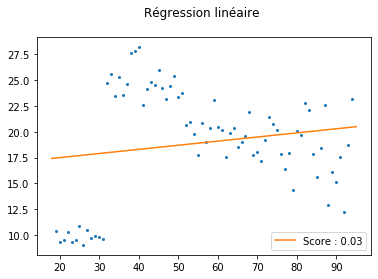

In [162]:
plt.plot(x, y, "o", markersize=2)
plt.plot(np.arange(18, 96), [a*x+b for x in np.arange(18, 96)], label=f"Score : {model.score(x, y):.2f}")
plt.title("Régression linéaire \n")
plt.legend(loc="lower right")
plt.show()

Comme prévu, le modèle de régression a un très mauvais coefficient de détermination, ce qui signifie qu'il ne peut expliquer que 3 % de nos points de données. Il n'est pas alors assez fiable. Regardons si les régressions en blocs peuvent donner de meilleurs résultats.

##### Chunk regressions

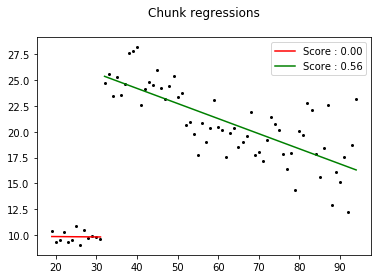

In [163]:
x1 = grouped.loc[grouped['age_2023'] < 32, ['age_2023']]
y1 = grouped.loc[grouped['age_2023'] < 32, 'freq_y']

x2 = grouped.loc[grouped['age_2023'] >= 32, ['age_2023']]
y2 = grouped.loc[grouped['age_2023'] >= 32, 'freq_y']

plt.plot(x, y, 'o', color='black', markersize=2)

couleurs = ['red', 'green']

for i in range(2):
    regr = LinearRegression()
    varx = eval("x" + str(i+1))
    vary = eval("y" + str(i+1))
    regr.fit(varx, vary)
    plt.plot(varx, regr.predict(varx), '-', color=couleurs[i], label=f"Score : {regr.score(varx,vary):.2f}")


plt.legend(loc="upper right")
plt.title("Chunk regressions\n")
plt.show()

Les régressions en blocs ne donnent pas de meilleurs résultats dans l'ensemble car les points de données sont très dispersés pour les âges de 19 à 31 ans. On peut apercevoir pourtant une bonne corrélation négative à partir de 32 ans entre les âges et la fréquence d'achat.

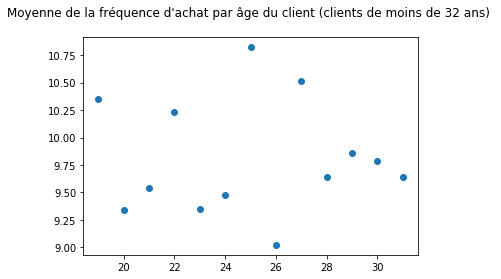

In [164]:
plt.plot(x1, y1, 'o')
plt.title("Moyenne de la fréquence d'achat par âge du client (clients de moins de 32 ans) \n")
plt.show()

<p style="border: solid #ff7366; padding:2rem; border-radius: 5px; text-align: center"><strong style="color:#AA2E22">Conclusion : </strong>Il y a un lien assez faible entre l’âge d'un client et la fréquence d'achat. Cependant, quand on a discrétisé les âges des clients, un lien plus important entre la tranche d'âge d'un client et la fréquence d'achat a été détecté. On a également observé un changement énorme et soudain de la fréquence d'achat entre clients de moins et de plus de 31 ans. Une sorte de mouvement artificiel à vérifier, en effet</p>

<div id="section_5_4"><h3 style="color:#AA2E22">4. Lien entre l’âge des clients et la taille du panier moyen</h3></div>

On va chercher deux types de relation :  
- s'il y a une corrélation entre l'âge des clients au moment d'achat et la taille moyenne du panier en quantité
- s'il y a une corrélation entre l'âge des clients au moment d'achat et le montant moyen du panier.

#### Test de normalité

##### Tests graphiques

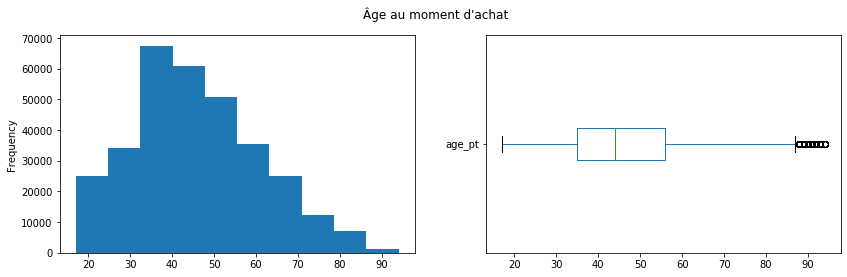

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Âge au moment d'achat \n")
baskets.age_pt.plot(kind='hist', ax=axes[0])
baskets.age_pt.plot(kind='box', vert=False, ax=axes[1])
plt.show()

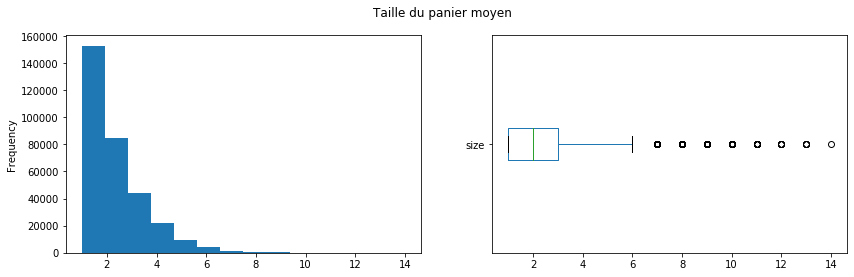

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Taille du panier moyen \n")
baskets['size'].plot(kind='hist', bins=14, ax=axes[0])
baskets['size'].plot(kind='box', vert=False, ax=axes[1])
plt.show() 

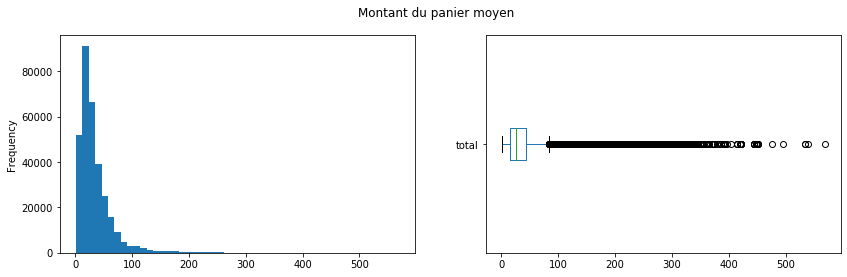

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Montant du panier moyen \n")
baskets.total.plot(kind='hist', bins=50, ax=axes[0])
baskets.total.plot(kind='box', vert=False, ax=axes[1])
plt.show() 

#####  Test d'ajustement de D'Agostino

In [168]:
s2k2, p = st.normaltest(baskets.age_pt)
print("Résultat du test d'ajustement de d'Agostino pour la variable age_pt")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable age_pt
S2 + K2 : 7845.018796853099, p-value : 0.0


In [169]:
s2k2, p = st.normaltest(baskets['size'])
print("Résultat du test d'ajustement de d'Agostino pour la variable size")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable size
S2 + K2 : 100635.73381600641, p-value : 0.0


In [170]:
s2k2, p = st.normaltest(baskets['total'])
print("Résultat du test d'ajustement de d'Agostino pour la variable total")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable total
S2 + K2 : 234346.752174642, p-value : 0.0


Aucune des trois variables, à savoir agt_pt, size et total, ne suit pas une distribution normale.

#### Tests de corrélation

##### Test de Spearman (non paramétrique)

###### Lien entre l'âge des clients au moment d'achat et la taille du panier moyen en quantité

In [171]:
st.spearmanr(baskets['age_pt'], baskets['size'])

SpearmanrResult(correlation=-0.23425577413934068, pvalue=0.0)

Il existe une corrélation négative et assez faible entre l'âge au moment d'achat et la taille du panier moyen en quantité.

###### Lien entre l'âge des clients au moment d'achat et le montant moyen du panier

In [172]:
st.spearmanr(baskets['age_pt'], baskets['total'])

SpearmanrResult(correlation=-0.34085951941702963, pvalue=0.0)

De même, il existe une corrélation négative et assez faible entre l'âge au moment d'achat et le montant moyen du panier.

#### Régression linéaire

*Régression linéaire pour modéliser la relation entre l'âge des clients au moment d'achat et le montant moyen du panier*

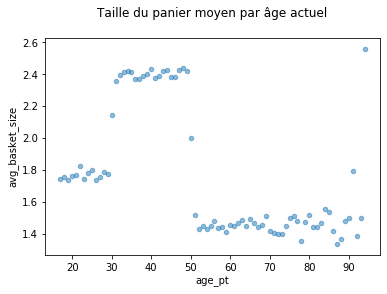

In [173]:
grouped = baskets.groupby('age_pt').agg({'size': 'mean', 'total': 'mean'})
grouped.columns = ['avg_basket_size', 'avg_basket_total']
grouped = grouped.reset_index()

grouped.plot.scatter(x='age_pt', y='avg_basket_size', alpha=0.5)
plt.title('Taille du panier moyen par âge actuel\n')
plt.show()

On remarque trois groupes d'âge, à savoir 19-31, 31-50 et 51+, entre lesquelles on observe un changement de mouvement très net concernant la taille du panier moyen. Il semble qu'il n'y ait pas de relation linéaire entre les variables.

In [174]:
x = grouped[['age_pt']]
y = grouped['avg_basket_size']
model = LinearRegression().fit(x, y)

a = model.coef_
b = model.intercept_
print(f"intercept : {b}")
print(f"coefficient : {a}")
r_sq = model.score(x, y)
print(f"coefficient de détermination : {r_sq}")

intercept : 2.3002119828639027
coefficient : [-0.00951656]
coefficient de détermination : 0.2818691134691168


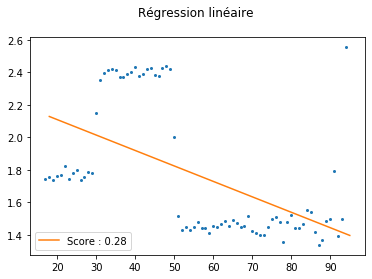

In [175]:
plt.plot(x, y, "o", markersize=2)
plt.plot(np.arange(18, 96), [a*x+b for x in np.arange(18, 96)], label=f"Score : {model.score(x, y):.2f}")
plt.title("Régression linéaire \n")
plt.legend(loc="lower left")
plt.show()

Comme prévu, le coefficient de détermination est assez petit (0.28), ce qui nous laisse penser qu'il y a un lien très faible entre l'âge d'un client au moment d'achat et la taille du panier moyen en quantité. Au fait, la corrélation est négative.

*Régression linéaire pour modéliser la relation entre l'âge des clients au moment d'achat et le montant moyen du panier*

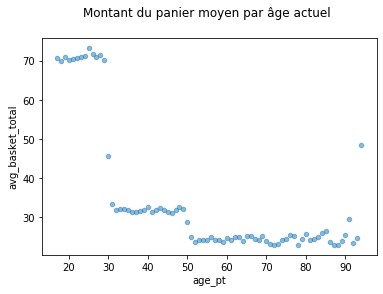

In [176]:
grouped.plot.scatter(x='age_pt', y='avg_basket_total', alpha=0.5)
plt.title('Montant du panier moyen par âge actuel \n')
plt.show()

Là encore une fois, on voit un changement de mouvement très net, mais cette fois-ci concernant le montant moyen du panier entre les trois groupes d'âges.

In [177]:
x = grouped[['age_pt']]
y = grouped['avg_basket_total']
model = LinearRegression().fit(x, y)

a = model.coef_
b = model.intercept_
print(f"intercept : {b}")
print(f"coefficient : {a}")
r_sq = model.score(x, y)
print(f"coefficient de détermination : {r_sq}")

intercept : 64.79268400990993
coefficient : [-0.54203468]
coefficient de détermination : 0.5204539715282643


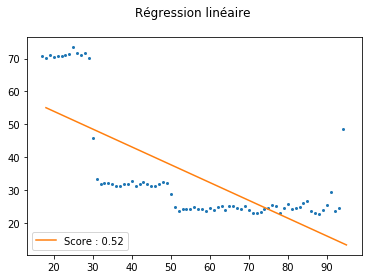

In [178]:
plt.plot(x, y, "o", markersize=2)
plt.plot(np.arange(18, 96), [a*x+b for x in np.arange(18, 96)], label=f"Score : {model.score(x, y):.2f}")
plt.title("Régression linéaire \n")
plt.legend(loc="lower left")
plt.show()

Le coefficient de détermination est 0.52, ce qui nous laisse penser qu'il y a aussi un lien assez faible entre l'âge des clients au moment d'achat et le montant moyen du panier. La corrélation est également négative.

<p style="border: solid #ff7366; padding:2rem; border-radius: 5px; text-align: center"><strong style="color:#AA2E22">Conclusion : </strong>Il y a un lien entre l’âge d'un client au moment d'achat et la taille du panier moyen. De même, il y a un lien entre l’âge d'un client au moment d'achat et le montant moyen du panier. À noter que la corrélation dans les deux cas est assez faible et négative. On a également observé trois clusters d'âge, chacune a une taille du panier moyen et un montant moyen de panier assez différenciés.</p>

<div id="section_5_5"><h3 style="color:#AA2E22">5. Lien entre l’âge des clients et les catégories des livres achetés</h3></div>

#### Test de normalité

##### Tests graphiques

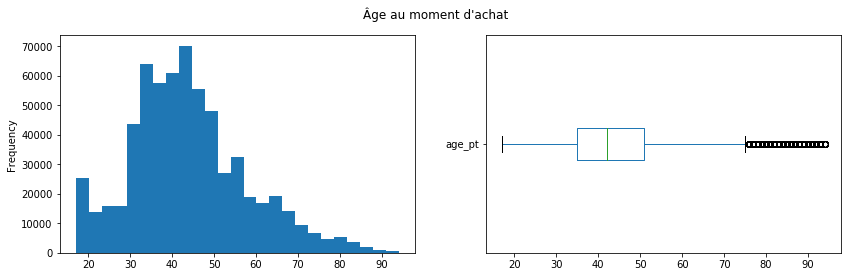

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle("Âge au moment d'achat \n")
ccs.age_pt.plot(kind='hist', bins=25, ax=axes[0])
ccs.age_pt.plot(kind='box', vert=False, ax=axes[1])
plt.show() 

#####  Test d'ajustement de D'Agostino

In [180]:
s2k2, p = st.normaltest(ccs.age_pt)
print("Résultat du test d'ajustement de d'Agostino pour la variable age_pt")
print(f'S2 + K2 : {s2k2}, p-value : {p}')

Résultat du test d'ajustement de d'Agostino pour la variable age_pt
S2 + K2 : 33931.48198928572, p-value : 0.0


La p-value du test de D'Agostino est 0, c-à-d la variable age_pt ne suit pas du tout une distribution normale.

#### Tests de corrélation

##### Test de Kruskal-Wallis (non paramétrique)

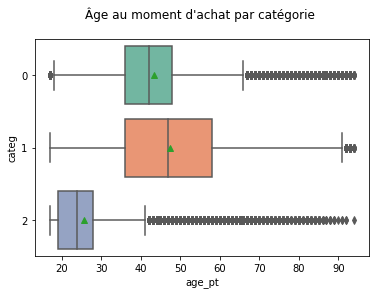

In [181]:
sns.boxplot(x='age_pt', y='categ', data=ccs, orient='h', showmeans=True, palette='Set2')
plt.title("Âge au moment d'achat par catégorie \n")
plt.show()

In [182]:
h, p = st.kruskal(ccs['age_pt'][ccs['categ'] == 0], 
                    ccs['age_pt'][ccs['categ'] == 1],
                    ccs['age_pt'][ccs['categ'] == 2])
print(f"H-Stat : {h}, p-value : {p}")

H-Stat : 72320.05554624702, p-value : 0.0


La p-value est 0, le H est très grand, on peut alors dire qu'il y a une différence statiquement significative entre la catégorie des livres et l'âge des client au moment d'achat. Autrement dit, il y a un lien très fort entre l’âge des clients et la catégorie des livres achetés.

#### Test du Khi2

Pour confirmer la conclusion précédente, on va utiliser aussi le test du khi2. On va surtout chercher s'il y a une différence significative entre deux variables qualitatives : la tranche d'âge et la catégorie.

##### Hypothèses de travail

Tout d'abord, il est essentiel de formuler les hypothèses de travail. En effet, il s'agit de deux hypothèses contradictoires :
- H0 - hypothèse dite nulle : Il n'y a pas un lien entre la tranche d'âge d'un client et les catégories des livres achetés.
- H1 - hypothèse dite alternative : Il y a un lien entre la tranche d'âge d'un client et les catégories des livres achetés.

##### Tableau de contingence : Effectifs observés

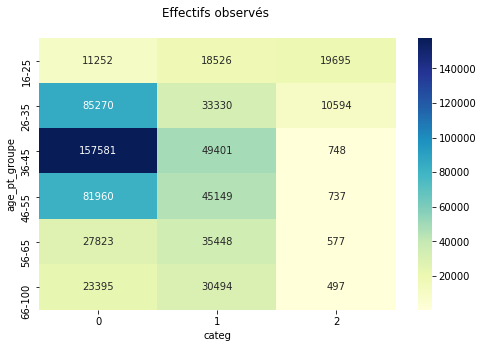

In [183]:
observed = pd.crosstab(ccs['age_pt_groupe'], ccs['categ'])
plt.figure(figsize=(8, 5)) 
sns.heatmap(observed, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Effectifs observés \n")
plt.show()

In [184]:
# Créer le tableau de contingence
observed_total = pd.crosstab(ccs['age_pt_groupe'], ccs['categ'], margins=True, margins_name="Total")
observed_total

categ,0,1,2,Total
age_pt_groupe,,,,
16-25,11252,18526,19695,49473
26-35,85270,33330,10594,129194
36-45,157581,49401,748,207730
46-55,81960,45149,737,127846
56-65,27823,35448,577,63848
66-100,23395,30494,497,54386
Total,387281,212348,32848,632477


##### Tableau de contingence : Effectifs théoriques

In [185]:
# Générer les effectifs théoriques
x = observed_total.loc[:, ["Total"]]
y = observed_total.loc[["Total"], :]
n = len(ccs)
expected = x.dot(y) / n
expected

categ,0,1,2,Total
age_pt_groupe,,,,
16-25,30293.517,16610.078,2569.404,49473.000
26-35,79108.618,43375.629,6709.753,129194.000
36-45,127198.115,69743.327,10788.558,207730.000
46-55,78283.205,42923.051,6639.744,127846.000
56-65,39095.678,21436.345,3315.977,63848.000
66-100,33301.866,18259.570,2824.563,54386.000
Total,387281.000,212348.000,32848.000,632477.000


##### Calcul du Khi2

In [186]:
chi2_table = (observed - expected) ** 2 / expected # Khi2 calculé
chi2 = chi2_table.sum().sum() # Calcul de Khi2
print('Khi2 : ', round(chi2, 2))

Khi2 :  187195.02


##### Calcul de la p-value

In [187]:
# Calcul de Khi2 et p-value. 
c, p, dof, expected = st.chi2_contingency(observed) 
print('Khi2 :', round(c, 2))
print('p-value :', p)
print('ddl :', dof)

Khi2 : 187195.02
p-value : 0.0
ddl : 10


La valeur du test du Khi2 est très grande. La p-value est zéro, on peut facilement rejeter l'hypothèse nulle H0 et accepter l'hypothèse alternative H1. Donc, le test du Khi2 confirme la corrélation très forte entre l’âge des clients et les catégories des livres achetés.

<p style="border: solid #ff7366; padding:2rem; border-radius: 5px; text-align: center"><strong style="color:#AA2E22">Conclusion : </strong>Il y a un lien très fort entre l’âge des clients et les catégories des livres achetés </p>